In [71]:
import pandas as pd
import numpy as np

In [72]:
import pandas as pd
import numpy as np
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [73]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [74]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [75]:
# Merging two datasets
movies = movies.merge(credits,on='title')

In [76]:
# Choosing important columns from movies dataset
# genres
# id
# keywords
# title
# overview
# Cast 
# Crew 

movies = movies[['movie_id', 'title', 'overview','genres', 'keywords', 'cast', 'crew' ]]

In [77]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [78]:
# creating new dataframe. It will contain three column. Movie ID | Title | Tags , for that I will merge genres overview keywords cast and crew columns. 
#To do that. I will have to remove special character and then move on merging the columns.

In [79]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [80]:
#Three movies doesn't have overview. Therefore, dropping them.
movies.dropna(inplace=True)

In [81]:
#checking for duplicated values/movies

movies.duplicated().sum()

np.int64(0)

In [82]:
#data cleaning for genre column
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [83]:
import ast 
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

#because of strings the obj couldn't pass. therefore, we need to pass these strings as list. 
#We have a module in py called as 'ast' and a function called as literal_eval which will conver the string to list.

In [84]:
import ast 
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [85]:
movies['genres'] = movies['genres'].apply(convert)

In [86]:
# data cleaning for keywords column by using the same function. 
movies['keywords'] = movies['keywords'].apply(convert)

In [87]:
#In cast, We need top 3 casts. Therefore, i will have to enter cast's actual name from the cast column. 
# for that, I am using the same function as above literal_eval. 
#this time setting the counter to 3 to get top 3, append it and increment the count else will break it

import ast 
def convert(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [88]:
movies['cast'] = movies['cast'].apply(convert)

In [89]:
# for crew column,we have alot of dictionaries. We are interested in job_value is "Director". 
# Because any watcher will be interested to know who the director is. 

import ast 
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

movies['crew'] = movies['crew'].apply(fetch_director)

In [90]:
#converting overview column to list. 
movies['overview'].apply(lambda x:x.split()) #this will help me getting each row as a list. 

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

In [91]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [92]:
# There are empty spaces in genres,keywords,cast,crew columns. To avoid future ambiguity in fetching. I will have to apply transformation
# Applying the transformation for all columns. 

movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","")for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [93]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [94]:
# creating tags column which will be the concatenation of all columns
# also using lambda function and isinstance() to check if the list type before joining elemes
# this will help in handle cases where column contains lists and it will join them with spaces
# Convert lists to strings before concatenation

movies['tags'] = (
    movies['overview'] + ' ' + 
    movies['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)) + ' ' + 
    movies['keywords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)) + ' ' + 
    movies['cast'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)) + ' ' + 
    movies['crew'].apply(lambda x: ''.join(x) if isinstance(x, list) else str(x))
)

In [95]:
import pandas as pd
from collections import Counter
all_genres = []
for genre_list in movies['genres']:
    all_genres.extend(genre_list)
genre_freq = Counter(all_genres)
top_10 = genre_freq.most_common(10)

# Convert to DataFrame for display
genre_table = pd.DataFrame(top_10, columns=['Genre', 'Frequency'])
print(genre_table)

            Genre  Frequency
0           Drama       2299
1          Comedy       1723
2        Thriller       1275
3          Action       1156
4         Romance        895
5       Adventure        792
6           Crime        697
7  ScienceFiction        538
8          Horror        520
9          Family        514


In [96]:
import pandas as pd
from collections import Counter

all_actors = []
for cast_list in movies['cast']:
    all_actors.extend(cast_list)
actor_freq = Counter(all_actors)
top_10_actors = actor_freq.most_common(10)

# Convert to DataFrame for display
actor_table = pd.DataFrame(top_10_actors, columns=['Actor', 'Frequency'])
print(actor_table)

              Actor  Frequency
0      RobertDeNiro         46
1   SamuelL.Jackson         35
2       BruceWillis         35
3         MattDamon         35
4       NicolasCage         34
5        JohnnyDepp         32
6          BradPitt         30
7          TomHanks         29
8     MorganFreeman         29
9  DenzelWashington         29


In [97]:
new_df = movies[['movie_id', 'title', 'tags']]

In [98]:
new_df

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [99]:
#converting to lowercase. 
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower()if isinstance(x, str) else x)

C:\Users\deven\AppData\Local\Temp\ipykernel_17632\4195199011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower()if isinstance(x, str) else x)


In [100]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"In the 22nd century, a paraplegic Marine is di..."


In [101]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [102]:
import nltk 

In [103]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

In [104]:
def stem(text):
    y = []
    for i in text.split():
       y.append(ps.stem(i))
    return " ".join(y)

In [105]:
ps.stem('dancing')

'danc'

In [106]:
stem('in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jame cameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jame cameron'

In [107]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\deven\AppData\Local\Temp\ipykernel_17632\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [108]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [109]:
new_df['tags'][1]

"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the earth with will turner and elizabeth swann. but noth is quit as it seems. adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofone'slif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley goreverbinski"

In [110]:
new_df['tags'][4]

"john carter is a war-weary, former militari captain who' inexplic transport to the mysteri and exot planet of barsoom (mars) and reluctantli becom embroil in an epic conflict. it' a world on the brink of collapse, and carter rediscov hi human when he realiz the surviv of barsoom and it peopl rest in hi hands. action adventur sciencefict basedonnovel mar medallion spacetravel princess alien steampunk martian escap edgarriceburrough alienrac superhumanstrength marscivil swordandplanet 19thcenturi 3d taylorkitsch lynncollin samanthamorton andrewstanton"

# using text vectorization. Currently the data is in this format. 
# movie_id | Name | Tags 
      # Now, I need to convert these tags in to vectors.
      # Basically, I will convert " text --> Vectors" I am going to use 'bag of words'
      # for that I will have to combine all the tags(words). 
      # In this process. I will not be considering the "Stop Words" 

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english') #500 most frequenct words

In [112]:
vectors = cv.fit_transform(new_df['tags']).toarray() #explicitly converting this to numpy array, because most of them are in zeros.

In [113]:
vectors[2]

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
text_data = ["captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"]
cv.fit(text_data)
cv.get_feature_names_out()

array(['action', 'adventure', 'aftercreditsstinger', 'afterlife',
       'alliance', 'barbossa', 'believed', 'calypso', 'captain', 'come',
       'dead', 'drugabuse', 'earth', 'eastindiatradingcompany', 'edge',
       'elizabeth', 'exoticisland', 'fantasy', 'fighter', 'goreverbinski',
       'headed', 'johnnydepp', 'keiraknightley', 'life', 'long',
       'loveofone', 'ocean', 'orlandobloom', 'pirate', 'quite', 'ship',
       'shipwreck', 'slife', 'strongwoman', 'swann', 'swashbuckler',
       'traitor', 'turner'], dtype=object)

In [115]:
from sklearn.metrics.pairwise import cosine_similarity

In [116]:
cosine_similarity(vectors) #parsing all my verctors to cosine similarity to calculate the distance

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [117]:
cosine_similarity(vectors).shape

(4806, 4806)

In [118]:
similarity = cosine_similarity(vectors) #storing the calculated distanced vectors in a variable

In [119]:
similarity[1] #so here the metrics is displayed for the similaring under consine similary 

array([0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
       0.02615329])

In [120]:
new_df[new_df['title'] == 'Batman'].index[0]

np.int64(1360)

In [121]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0] #fetching index of the movie
    distances = similarity[movie_index]
    return

In [122]:
#now when sorted 
sorted(list(enumerate(similarity[0])),reverse=True) #whenever this is sorted, the index position is being lost

[(4805, np.float64(0.0)),
 (4804, np.float64(0.0)),
 (4803, np.float64(0.04499212706658476)),
 (4802, np.float64(0.046829290579084706)),
 (4801, np.float64(0.019252140716412975)),
 (4800, np.float64(0.0)),
 (4799, np.float64(0.052631578947368425)),
 (4798, np.float64(0.04223886030955117)),
 (4797, np.float64(0.0)),
 (4796, np.float64(0.0)),
 (4795, np.float64(0.0)),
 (4794, np.float64(0.0)),
 (4793, np.float64(0.05407380704358751)),
 (4792, np.float64(0.0)),
 (4791, np.float64(0.0)),
 (4790, np.float64(0.0582716546748065)),
 (4789, np.float64(0.060833032924035954)),
 (4788, np.float64(0.0)),
 (4787, np.float64(0.019672236884115842)),
 (4786, np.float64(0.0)),
 (4785, np.float64(0.019672236884115842)),
 (4784, np.float64(0.043355498476206004)),
 (4783, np.float64(0.0)),
 (4782, np.float64(0.025649458802128853)),
 (4781, np.float64(0.0582716546748065)),
 (4780, np.float64(0.0)),
 (4779, np.float64(0.0)),
 (4778, np.float64(0.0)),
 (4777, np.float64(0.10814761408717502)),
 (4776, np.float

In [123]:
# now it has been sorted based on the  movie serial number not the indexed postition of the movie. 
# lambda function will give us next 5 recommendations 

sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(1214, np.float64(0.2867696673382022)),
 (2405, np.float64(0.26901379342448517)),
 (3728, np.float64(0.2605130246476754)),
 (507, np.float64(0.255608593705383)),
 (539, np.float64(0.25038669783359574))]

In [142]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0] #finding the index of the input movie
    distances = similarity[movie_index] #will get similarity scores of this movie with all other movie
    #sort the movies by similarity score in decending order, skip the first one(input movie)
    # and then takes the 5 most similar movies
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6] 
    # print the titles of the 5 most similar movies
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [141]:
recommend('The Dark Knight Rises')

The Dark Knight
Batman Returns
Batman
Batman Forever
Batman Begins


In [126]:
new_df.to_dict()

{'movie_id': {0: 19995,
  1: 285,
  2: 206647,
  3: 49026,
  4: 49529,
  5: 559,
  6: 38757,
  7: 99861,
  8: 767,
  9: 209112,
  10: 1452,
  11: 10764,
  12: 58,
  13: 57201,
  14: 49521,
  15: 2454,
  16: 24428,
  17: 1865,
  18: 41154,
  19: 122917,
  20: 1930,
  21: 20662,
  22: 57158,
  23: 2268,
  24: 254,
  25: 597,
  26: 271110,
  27: 44833,
  28: 135397,
  29: 37724,
  30: 558,
  31: 68721,
  32: 12155,
  33: 36668,
  34: 62211,
  35: 8373,
  36: 91314,
  37: 68728,
  38: 102382,
  39: 20526,
  40: 49013,
  41: 44912,
  42: 10193,
  43: 534,
  44: 168259,
  45: 72190,
  46: 127585,
  47: 54138,
  48: 81005,
  49: 64682,
  50: 9543,
  51: 68726,
  52: 38356,
  53: 217,
  54: 105864,
  55: 62177,
  56: 188927,
  57: 10681,
  58: 5174,
  59: 14161,
  60: 17979,
  61: 76757,
  62: 258489,
  63: 411,
  64: 246655,
  65: 155,
  66: 14160,
  67: 15512,
  68: 1726,
  69: 44826,
  70: 8487,
  71: 1735,
  72: 297761,
  73: 2698,
  74: 137113,
  75: 9804,
  76: 14869,
  77: 150540,
  78:

In [127]:
import pickle 
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [128]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [129]:
pickle.dump(similarity,open('similarity.pkl', 'wb'))

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the original dataset
movies = pd.read_csv('tmdb_5000_movies.csv')

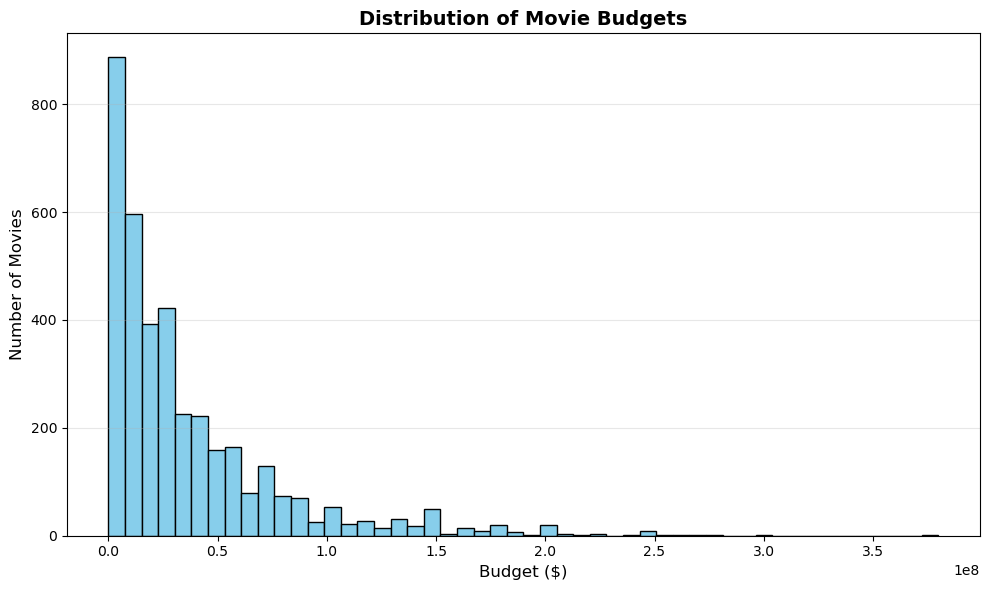

In [137]:
plt.figure(figsize=(10, 6))
plt.hist(movies[movies['budget'] > 0]['budget'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Distribution of Movie Budgets', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('budget_distribution.png', dpi=300)
plt.show()


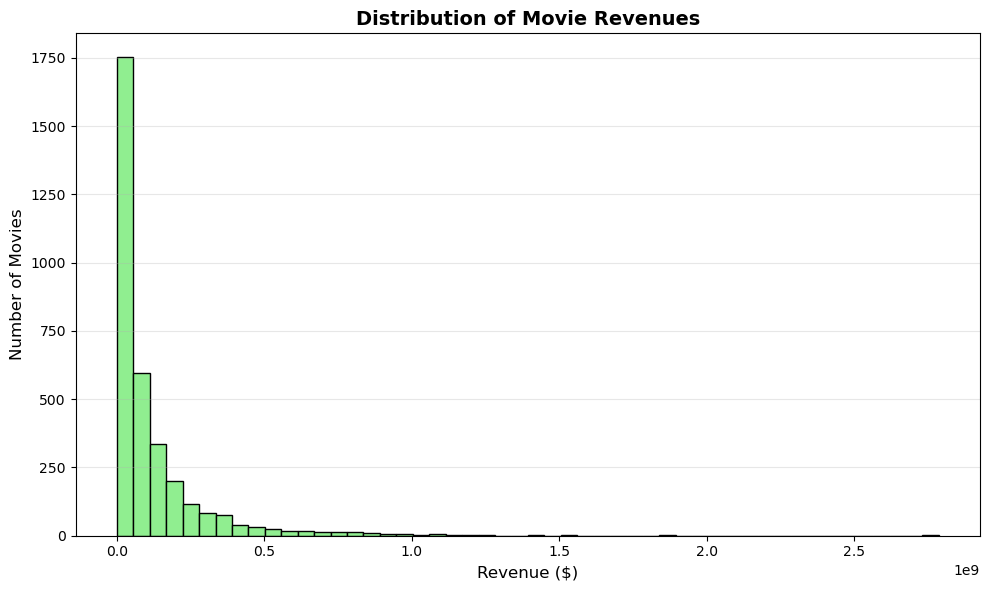

In [138]:
plt.figure(figsize=(10, 6))
plt.hist(movies[movies['revenue'] > 0]['revenue'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Distribution of Movie Revenues', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('revenue_distribution.png', dpi=300)
plt.show()


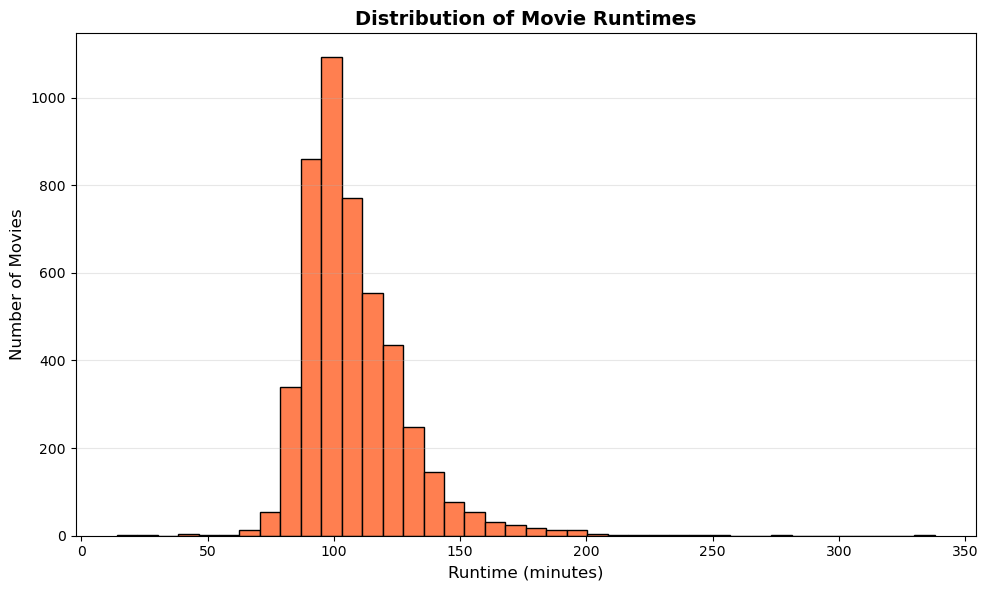

In [139]:
plt.figure(figsize=(10, 6))
plt.hist(movies[movies['runtime'] > 0]['runtime'], bins=40, color='coral', edgecolor='black')
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Distribution of Movie Runtimes', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('runtime_distribution.png', dpi=300)
plt.show()


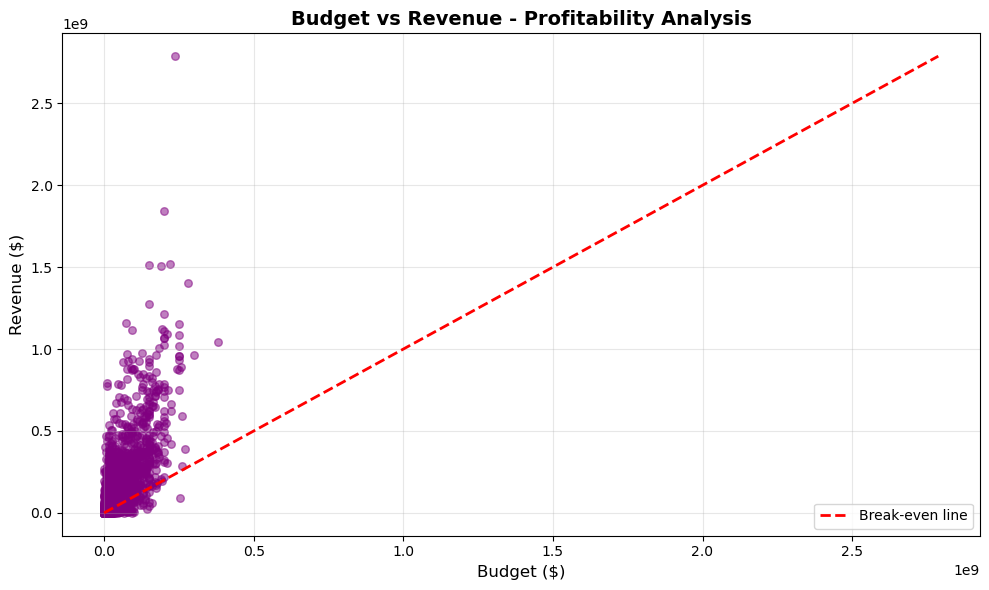

In [140]:
# Filter out movies with zero budget or revenue
profitable_movies = movies[(movies['budget'] > 0) & (movies['revenue'] > 0)]

plt.figure(figsize=(10, 6))
plt.scatter(profitable_movies['budget'], profitable_movies['revenue'], 
            alpha=0.5, color='purple', s=30)
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.title('Budget vs Revenue - Profitability Analysis', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add diagonal line (break-even line)
max_val = max(profitable_movies['budget'].max(), profitable_movies['revenue'].max())
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Break-even line')
plt.legend()
plt.tight_layout()
plt.savefig('budget_vs_revenue.png', dpi=300)
plt.show()
